# Programming Languages Annual Salary Survey - Collected Data using Web Scraping


In [2]:
# URL to extract from the data

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"


The data needed to be scraped is:
<b> the name of the programming language </b>, and the <b>average annual salary.</b>


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
!pip3 install bs4


In [4]:
data = requests.get(url).text


Creating a soup object


In [5]:
soup = BeautifulSoup(data, "html.parser")


Scraping the <b>Language name</b> and, <b>annual average salary</b>


In [6]:
table = soup.find('table')


In [7]:
language_list = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language_name = cols[1].getText()
    Annual_average_salary = cols[3].getText()
    print("{}--->{}".format(Language_name, Annual_average_salary))
    language_list.append([Language_name, Annual_average_salary])


Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Saving the scarped data into a file named popular-languages.csv


In [8]:
df_lang = pd.DataFrame(language_list, columns=[
                       'Language', 'Average Annual Salary'])
filename = "popular-languages.csv"
df_lang.to_csv(filename)
df = pd.read_csv(filename, header=1)
df


,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


In [9]:
# Cleaning data
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=False, inplace=True)
del df['0']
df = df.set_index('Language')
df


,Average Annual Salary
Language,
Swift,130801.0
Python,114383.0
C++,113865.0
Javascript,110981.0
Java,101013.0
Go,94082.0
R,92037.0
C#,88726.0
SQL,84793.0


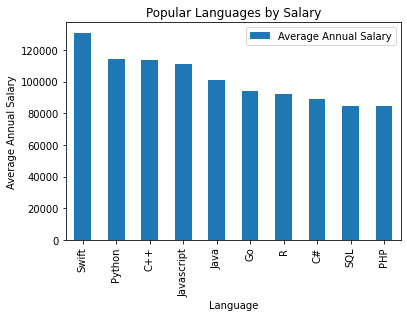

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df.plot(kind='bar', label=True)
plt.title("Popular Languages by Salary")
plt.xlabel("Language")
plt.ylabel("Average Annual Salary")
plt.show()


<b> Observation </b> <br>

For the top 10 rankings of the most popular languages arranged by salary. The highest paid programming language is Swift, which falls at $130,801. Swift is a programming language developed by Apple Inc. for its products among iOS, macOS, iPadOS, watchOS, and tvOS.
In the recent years, we can see that there's a popular trend in companies developing their own apps, therefore we can see that they're willing to pay a higher wage for Swift proficient. Python,
C++, and Javascript are also high up at around $110,000 annual salary.
